In [ ]:
!pip install llama-index

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.2/304.2 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 11.8 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade llama-index
%pip install llama-index llama-index-llms-openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.2/304.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 9.8 MB/s eta 0:00:00


In [ ]:
pip install PyPDF2 langchain


In [ ]:
# The nest_asyncio module enables the nesting of asynchronous functions within an already running async loop.
# This is necessary because Jupyter notebooks inherently operate in an asynchronous loop.
# By applying nest_asyncio, we can run additional async functions within this existing loop without conflicts.
import nest_asyncio

nest_asyncio.apply()

# from llama_index.evaluation import generate_question_context_pairs

# from llama_index.vector_store import VectorStoreIndex
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, ServiceContext
# from llama_index import SimpleDirectoryReader, ServiceContex
from llama_index.core.node_parser import SimpleNodeParser

# from llama_index.core.node_parser import SentenceSplitter

from llama_index.core.evaluation import RetrieverEvaluator
from llama_index.core.evaluation import generate_question_context_pairs

#from llama_index.core.evaluation import RetrieverEvaluator

from llama_index.llms.openai import OpenAI

import os
import pandas as pd

In [ ]:
##add the openAI key
os.environ['OPENAI_API_KEY'] = ''

In [ ]:
import urllib.request

In [ ]:
pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
from google.colab import files

# This will open a file picker for you to upload from your local computer
uploaded = files.upload()


Saving 978-3-031-02333-0.pdf to 978-3-031-02333-0.pdf


In [ ]:
import PyPDF2

def extract_chapter_from_pdf(pdf_path, start_page, end_page):
    # Open the PDF file
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)

        # Extract text from the specified range of pages
        text = ""
        for page_num in range(start_page, end_page + 1):
            text += reader.pages[page_num].extract_text()

    return text

# Specify the PDF path and page range for the chapter
pdf_path = "978-3-031-02333-0.pdf"
start_page = 38  # Start of the chapter
end_page = 53   # End of the chapter

chapter_text = extract_chapter_from_pdf(pdf_path, start_page, end_page)

# Print extracted chapter text (you can choose to process it further)
print(chapter_text)



24 CHAPTER 3. MUL TICS
bid in 1963. Folklore has it that IBM was not interested in Project MAC’s ideas for paging and
segmentation, so instead General Electric (GE) was chosen to build the hardware for the project,the eventual GE 645. Bell Labs joined the software development in 1965.
The Multics project had very ambitious and revolutionary goals, so it is not surprising that the
project had its moments of intrigue. The project called for delivery of the project in two and a halfyears, but delivery of the GE 645 hardware was delayed such that Multics was not self-hosting
2until
1968. ARPA considered terminating the project in 1969, and Bell Labs dropped out of the project in1969 as well. Ultimately, the Multics system itself proved to be bigger, slower, and less reliable thanexpected, but a number of signiﬁcant operating systems and security features were developed thatlive on in modern systems, such as the UNIX system that was developed by some of the associatedBell Labs researchers a

In [ ]:
from llama_index.core.schema import Document
documents = [Document(text=chapter_text)]

# Define an LLM
llm = OpenAI(model="gpt-4")

# **Step 1: Split into chunks**
node_parser = SimpleNodeParser.from_defaults(chunk_size=512)
nodes = node_parser.get_nodes_from_documents(documents)

# **Step 2: Create vector index**
vector_index = VectorStoreIndex(nodes)

print(vector_index)

# # **Step 3: Querying the Index**
# query_engine = vector_index.as_query_engine()
# response = query_engine.query("What is discussed in this chapter?")

# print(response.response)


In [ ]:
query_engine = vector_index.as_query_engine()

In [ ]:
# response_vector = query_engine.query("What is the role of the Multics reference monitor in ensuring system security?"

# "How did Multics implement authorization for segment access, and how did hardware extensions improve this process?"

# "What are the security risks associated with ring transitions in the Multics protection model?"

# "How does the Multics system prevent unauthorized access when transitioning between different rings?"

# "What is the function of the gatekeeper in Multics, and how does it validate argument access?",)

In [ ]:
queries = [
    "What is the role of the Multics reference monitor in ensuring system security?",
    "How did Multics implement authorization for segment access, and how did hardware extensions improve this process?",
    "What are the security risks associated with ring transitions in the Multics protection model?",
    "How does the Multics system prevent unauthorized access when transitioning between different rings?",
    "What is the function of the gatekeeper in Multics, and how does it validate argument access?",
    "How does Multics ensure complete mediation for security-sensitive operations?",
    "What are the challenges in verifying the correctness of the reference monitor in Multics?",
    "How does Multics enforce tamperproof protection of its trusted computing base (TCB)?",
    "What security design flaws in Multics contributed to potential breaches despite its strong security architecture?",
    "How did the security lessons learned from Multics influence the design of later operating systems like UNIX and Windows?"
]

for query in queries:
    response_vector = query_engine.query(query)  # Querying one question at a time

    print(f"Query: {query}")
    print("Retrieved Chunks:")
    for i, node in enumerate(response_vector.source_nodes):
        print(f"Chunk {i+1}:")
        print(node.get_text())
        print("-" * 50)


Query: What is the role of the Multics reference monitor in ensuring system security?
Retrieved Chunks:
Chunk 1:
3.3 MUL TICS SECURITY
We evaluate the security of Multics system using the reference monitor principles stated in Chapter 2:
complete mediation, tamperprooﬁng, and veriﬁability. Unlike the commercial operating systemsdiscussed in the next chapter, Multics performs well on these metrics. Nonetheless, we will see thatit is difﬁcult to completely achieve these requirements. In the next section, we will discuss how theimplementation may cause breaches in security, even in well designed systems.
1.Complete Mediation: How does the reference monitor interface ensure that all security-sensitive operations are mediated correctly?
Since Multics requires that each instruction accesses a segment and each segment access
is mediated, Multics provides complete mediation at the segment level. Thus, all securityrequirements that can be effectively expressed in segments can be mediated in Mul

In [ ]:
query = """
Answer the following questions in detail:
1. What is the role of the Multics reference monitor in ensuring system security?
2. How did Multics implement authorization for segment access, and how did hardware extensions improve this process?
3. What are the security risks associated with ring transitions in the Multics protection model?
4. How does the Multics system prevent unauthorized access when transitioning between different rings?
5. What is the function of the gatekeeper in Multics, and how does it validate argument access?
"""

response_vector = query_engine.query(query)  # Single query with structured format
print(response_vector.response)


1. The Multics reference monitor plays a crucial role in ensuring system security by providing complete mediation at the segment level, memory access, and ring transitions. It ensures that all security-sensitive operations are mediated correctly, preventing unauthorized access to system resources.

2. Multics implements authorization for segment access by requiring that each instruction accesses a segment and each segment access is mediated. MLS labels for segments are stored in directories rather than directly in the segments, ensuring that the mapping between segments and their access classes is used correctly. Hardware extensions, such as gates, improve this process by checking the format of arguments to higher-privileged code, preventing malicious inputs and enhancing security.

3. Security risks associated with ring transitions in the Multics protection model include the potential for unauthorized processes to access higher privileged code in ring 0. If gates are not correctly imp

In [ ]:
# First retrieved node
response_vector.source_nodes[0].get_text()

'3.3 MUL TICS SECURITY\nWe evaluate the security of Multics system using the reference monitor principles stated in Chapter 2:\ncomplete mediation, tamperprooﬁng, and veriﬁability. Unlike the commercial operating systemsdiscussed in the next chapter, Multics performs well on these metrics. Nonetheless, we will see thatit is difﬁcult to completely achieve these requirements. In the next section, we will discuss how theimplementation may cause breaches in security, even in well designed systems.\n1.Complete Mediation: How does the reference monitor interface ensure that all security-sensitive operations are mediated correctly?\nSince Multics requires that each instruction accesses a segment and each segment access\nis mediated, Multics provides complete mediation at the segment level. Thus, all securityrequirements that can be effectively expressed in segments can be mediated in Multics.\nMLS labels for segments are stored in their directories rather than directly in the segments,\nso Mu

In [ ]:
# Second retrieved node
response_vector.source_nodes[1].get_text()

'Multics also mediates ring transitions, in both directions. Thus, the refer-ence monitor provides mediation at memory and ring levels. Multics’ ring transitions provideargument validation via gatekeepers, which is not part of the reference monitor in modern sys-\ntems (although argument validation is performed pr ocedurally in modern operating system).\nIn practice, the Multics master mode permits code to run in a higher ring level without the full\nring transition, see Section 3.4 below.\nAlso, TCB servers may have ﬁner-grained access control (i.e., within segments), but this is\nbeyond the ability of Multics. If Multics had a server that is trusted to support clients of multiplesecrecy levels, it must also ensure that there is no way that an unauthorized information leakcan occur (e.g., the confused deputy problem, see Chapter 10). In general, such servers must be\ntrusted with such permissions.\n3.Complete Mediation: How do we verify that the reference monitor interface provides co

In [ ]:
##Evaluation

qa_dataset = generate_question_context_pairs(
    nodes,
    llm=llm,
    num_questions_per_chunk=2
)

100%|██████████| 30/30 [02:04<00:00,  4.15s/it]


In [ ]:
qa_dataset

EmbeddingQAFinetuneDataset(queries={'20f1bfc2-e8c2-4790-b171-0015dd71fa51': '"Discuss the challenges and setbacks faced during the development of the Multics project, and how these influenced the eventual outcome of the project."', '2607f8d3-c467-4989-91cf-000e97a3d313': '"Who were the primary purchasers of the Multics systems and why did the Multics project team consist of a diverse group of university and industry researchers in addition to government and industry engineers?"', 'cda941d8-5dde-4c06-a659-a5e099985891': '"Discuss the unique characteristics of the Multics project, including its breadth of tasks, diversity of partners, and duration under development. How did these factors contribute to the project\'s ability to pursue ambitious, long-term goals?"', 'fb55ba55-2e83-4cf4-a13e-b2c8faf2a551': '"Explain the fundamental concepts of the Multics system architecture, specifically the roles and functions of processes and segments within the system."', 'aae964e5-9440-405e-b5ff-a819af

In [ ]:
models = ["gpt-3.5-turbo", "gpt-3.5-turbo-16k", "gpt-4", "gpt-4-turbo"]

results = []

for model_name in models:
    print(f"Evaluating with model: {model_name}")
    llm = OpenAI(model=model_name, temperature=0)  # Set temperature to 0 for consistency
    query_engine = vector_index.as_query_engine(llm=llm)

    for question, answer in qa_dataset:
        predicted = query_engine.query(question).response

        results.append({
            "model": model_name,
            "question": question,
            "predicted": predicted,
            "ground_truth": answer
        })


Evaluating with model: gpt-3.5-turbo
Evaluating with model: gpt-3.5-turbo-16k
Evaluating with model: gpt-4
Evaluating with model: gpt-4-turbo


In [ ]:
retriever = vector_index.as_retriever(similarity_top_k=5)

In [ ]:
retriever_evaluator = RetrieverEvaluator.from_metric_names(
    ["mrr", "hit_rate"], retriever=retriever
)

In [ ]:
# Evaluate
eval_results = await retriever_evaluator.aevaluate_dataset(qa_dataset)

In [ ]:
pd.set_option('display.max_colwidth', None)

def display_results(name, eval_results):
    """Display results from evaluate."""

    metric_dicts = []
    for eval_result in eval_results:
        metric_dict = eval_result.metric_vals_dict
        metric_dicts.append(metric_dict)

    full_df = pd.DataFrame(metric_dicts)

    full_df["question"] = [res.query for res in eval_results]

    hit_rate = full_df["hit_rate"].mean()
    mrr = full_df["mrr"].mean()

    metric_df = pd.DataFrame(
        {"Retriever Name": [name], "Hit Rate": [hit_rate], "MRR": [mrr]}
    )

    return metric_df,full_df

In [ ]:
display_results("OpenAI Embedding Retriever", eval_results)

(               Retriever Name  Hit Rate       MRR
 0  OpenAI Embedding Retriever      0.95  0.686389,
          mrr  hit_rate  \
 0   1.000000       1.0   
 1   0.500000       1.0   
 2   1.000000       1.0   
 3   0.500000       1.0   
 4   1.000000       1.0   
 5   0.333333       1.0   
 6   1.000000       1.0   
 7   0.000000       0.0   
 8   1.000000       1.0   
 9   0.200000       1.0   
 10  0.500000       1.0   
 11  0.000000       0.0   
 12  0.200000       1.0   
 13  1.000000       1.0   
 14  1.000000       1.0   
 15  0.000000       0.0   
 16  1.000000       1.0   
 17  0.333333       1.0   
 18  1.000000       1.0   
 19  1.000000       1.0   
 20  1.000000       1.0   
 21  0.500000       1.0   
 22  1.000000       1.0   
 23  1.000000       1.0   
 24  0.500000       1.0   
 25  0.500000       1.0   
 26  0.200000       1.0   
 27  0.250000       1.0   
 28  1.000000       1.0   
 29  0.333333       1.0   
 30  1.000000       1.0   
 31  0.500000       1.0   
 32  1

In [ ]:
# from llama_index.core.evaluation import RelevancyEvaluator

# relevancy_gpt4 = RelevancyEvaluator(llm=gpt4)

In [ ]:
# Pick a query
# query = queries[10]

# query

'"Explain the role of the supervisor in the Multics system and how it is protected from other processes using protection rings. What are the key functionalities implemented by the supervisor?"'

In [ ]:
# Generate response.
# response_vector has response and source nodes (retrieved context)
# response_vector = query_engine.query(query)

# # Relevancy evaluation
# eval_result = relevancy_gpt4.evaluate_response(
#     query=query, response=response_vector
# )

In [ ]:
# You can check passing parameter in eval_result if it passed the evaluation.
# eval_result.passing

True

In [ ]:
# You can get the feedback for the evaluation.
# eval_result.feedback

'YES'

In [ ]:
##BATCH EVAL

# from llama_index.core.evaluation import BatchEvalRunner

# # Let's pick top 10 queries to do evaluation
# batch_eval_queries = queries[:10]

# # Initiate BatchEvalRunner to compute FaithFulness and Relevancy Evaluation.
# runner = BatchEvalRunner(
#     {"faithfulness": faithfulness_gpt4, "relevancy": relevancy_gpt4},
#     workers=8,
# )

# # Compute evaluation
# eval_results = await runner.aevaluate_queries(
#     query_engine, queries=batch_eval_queries
# )

In [ ]:
## Let's get faithfulness score

# faithfulness_score = sum(result.passing for result in eval_results['faithfulness']) / len(eval_results['faithfulness'])

# faithfulness_score

1.0

In [ ]:
## Let's get relevancy score

# relevancy_score = sum(result.passing for result in eval_results['relevancy']) / len(eval_results['relevancy'])

# relevancy_score


1.0

In [ ]:
from llama_index.core.settings import Settings
from llama_index.llms.openai import OpenAI
from llama_index.core.evaluation import RelevancyEvaluator, FaithfulnessEvaluator

# Define valid OpenAI models
gpt35_turbo = OpenAI(temperature=0, model="gpt-3.5-turbo")
gpt35_turbo_16k = OpenAI(temperature=0, model="gpt-3.5-turbo-16k")
gpt4 = OpenAI(temperature=0, model="gpt-4")
gpt4_turbo = OpenAI(temperature=0, model="gpt-4-turbo")

# List of models for evaluation
llms = {
    "GPT-3.5 Turbo": gpt35_turbo,
    "GPT-3.5 Turbo 16k": gpt35_turbo_16k,
    "GPT-4": gpt4,
    "GPT-4 Turbo": gpt4_turbo
}
# Step 1: Prepare 10 valid + 5 irrelevant queries

# ✅ Extract first 10 valid questions from your synthetic QA dataset
real_queries = list(qa_dataset.queries.values())[:10]

# ❌ Add 5 intentionally irrelevant queries
irrelevant_queries = [
    "What is the capital of Mars?",
    "How do I bake a chocolate cake?",
    "What's the weather like on Jupiter?",
    "Who won the 2025 Olympics?",
    "How do you cure hiccups in elephants?"
]

# 🔄 Combine them to create a 15-query test set
test_queries = real_queries + irrelevant_queries
# Dictionary to hold per-model results
evaluation_results = {}

# Loop through all 4 models
for model_name, model in llms.items():
    print(f"Evaluating with {model_name}...")
    Settings.llm = model

    # Create index and query engine with current model
    vector_index = VectorStoreIndex(nodes, service_context=model)
    query_engine = vector_index.as_query_engine()

    # Initialize evaluators
    relevancy_evaluator = RelevancyEvaluator(llm=model)
    faithfulness_evaluator = FaithfulnessEvaluator(llm=model)

    # Store individual results for this model
    model_results = []

    # Loop through all 15 queries
    for query in test_queries:
        is_irrelevant = query in irrelevant_queries

        response_vector = query_engine.query(query)

        relevancy_eval = relevancy_evaluator.evaluate_response(
            query=query, response=response_vector
        )

        faithfulness_eval = faithfulness_evaluator.evaluate_response(
            response=response_vector
        )

        model_results.append({
            "query": query,
            "response": response_vector.response,
            "is_Irrelevant": is_irrelevant,
            "relevancy_score": 1.0 if relevancy_eval.passing else 0.0,
            "faithfulness_score": 1.0 if faithfulness_eval.passing else 0.0,
            "relevancy_feedback": relevancy_eval.feedback,
            "faithfulness_feedback": faithfulness_eval.feedback
        })

    evaluation_results[model_name] = model_results


# Display results
for model_name, results in evaluation_results.items():
    print(f"\n===== {model_name} =====")

    for i, result in enumerate(results):
        print(f"\nQuery {i+1} ({'Irrelevant' if result['is_Irrelevant'] else 'Relevant'}): {result['query']}")
        print(f"Response: {result['response']}")
        print(f"Relevancy Score: {result['relevancy_score']} | Feedback: {result['relevancy_feedback']}")
        print(f"Faithfulness Score: {result['faithfulness_score']} | Feedback: {result['faithfulness_feedback']}")
        print("-" * 50)



Evaluating with GPT-3.5 Turbo...
Evaluating with GPT-3.5 Turbo 16k...
Evaluating with GPT-4...
Evaluating with GPT-4 Turbo...

===== GPT-3.5 Turbo =====

Query 1 (Relevant): "Discuss the challenges and setbacks faced during the development of the Multics project, and how these influenced the eventual outcome of the project."
Response: The challenges and setbacks faced during the development of the Multics project included delays in hardware delivery, which led to the project not being self-hosting until 1968. Additionally, there were concerns about project termination by ARPA in 1969, and Bell Labs dropping out of the project the same year. The Multics system itself turned out to be bigger, slower, and less reliable than expected. Despite these setbacks, significant operating systems and security features were developed that have influenced modern systems like UNIX. The project's ambitious goals, diverse partners, and the need to develop an entire ecosystem added to the complexity. How

In [ ]:
import pandas as pd

# Convert results into a structured table
response_data = {
    "Model": [],
    "Query": [],
    "Is Irrelevant": [],
    "Response": [],
    "Relevancy Score": [],
    "Faithfulness Score": []
}

# Loop through all results for each model
for model_name, model_results in evaluation_results.items():
    for result in model_results:
        response_data["Model"].append(model_name)
        response_data["Query"].append(result["query"])
        response_data["Is Irrelevant"].append(result["is_Irrelevant"])
        response_data["Response"].append(result["response"])
        response_data["Relevancy Score"].append(result["relevancy_score"])
        response_data["Faithfulness Score"].append(result["faithfulness_score"])

# Convert to DataFrame
df = pd.DataFrame(response_data)

model_avg = df.groupby("Model")[["Relevancy Score", "Faithfulness Score"]].mean()
print(model_avg)

# Print first few rows
print(df)



                   Relevancy Score  Faithfulness Score
Model                                                 
GPT-3.5 Turbo             0.733333            0.666667
GPT-3.5 Turbo 16k         0.800000            0.733333
GPT-4                     0.933333            1.000000
GPT-4 Turbo               0.666667            0.733333
                Model  \
0       GPT-3.5 Turbo   
1       GPT-3.5 Turbo   
2       GPT-3.5 Turbo   
3       GPT-3.5 Turbo   
4       GPT-3.5 Turbo   
5       GPT-3.5 Turbo   
6       GPT-3.5 Turbo   
7       GPT-3.5 Turbo   
8       GPT-3.5 Turbo   
9       GPT-3.5 Turbo   
10      GPT-3.5 Turbo   
11      GPT-3.5 Turbo   
12      GPT-3.5 Turbo   
13      GPT-3.5 Turbo   
14      GPT-3.5 Turbo   
15  GPT-3.5 Turbo 16k   
16  GPT-3.5 Turbo 16k   
17  GPT-3.5 Turbo 16k   
18  GPT-3.5 Turbo 16k   
19  GPT-3.5 Turbo 16k   
20  GPT-3.5 Turbo 16k   
21  GPT-3.5 Turbo 16k   
22  GPT-3.5 Turbo 16k   
23  GPT-3.5 Turbo 16k   
24  GPT-3.5 Turbo 16k   
25  GPT-3.5 Turbo 16

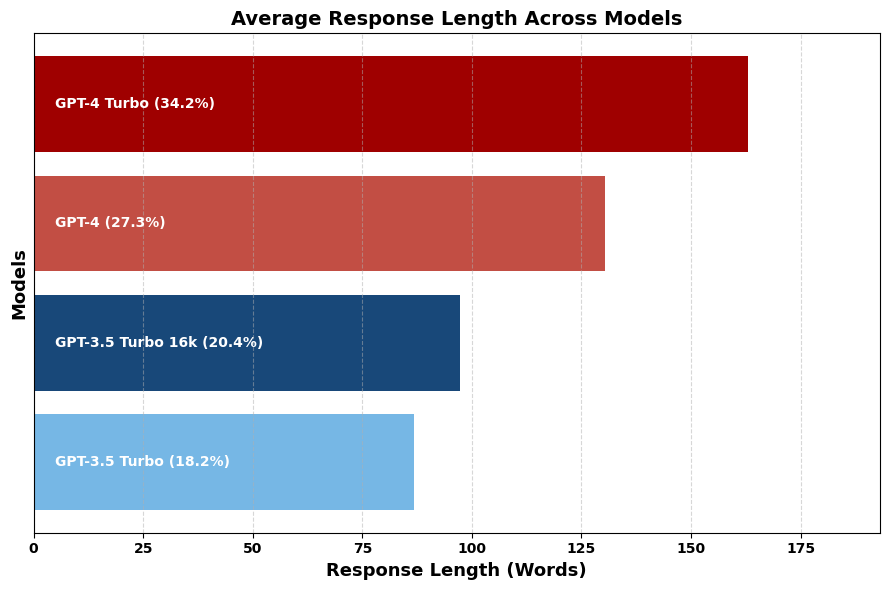

In [ ]:
import matplotlib.pyplot as plt

# Your data
model_names = ['GPT-3.5 Turbo', 'GPT-3.5 Turbo 16k', 'GPT-4', 'GPT-4 Turbo']
response_lengths = [86.7, 97.2, 130.4, 163.1]

# Compute percentages
total_length = sum(response_lengths)
percentages = [(length / total_length) * 100 for length in response_lengths]

# Plot
plt.figure(figsize=(9, 6))
bars = plt.barh(range(len(model_names)), response_lengths,
                color=['#76B7E5', '#184879', '#C24E44', '#9F0000'])

# Remove tick labels, but keep ticks
plt.yticks([])  # This removes model names
plt.tick_params(axis='y', length=0)  # Remove tick marks

# ✅ Add y-axis label "Models"
plt.ylabel("Models", fontsize=13, fontweight='bold')

# X-axis and title
plt.xlabel("Response Length (Words)", fontsize=13, fontweight='bold')
plt.title("Average Response Length Across Models", fontsize=14, fontweight='bold')
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.xticks(fontweight='bold')

# Add model name and percentage on the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    label = f"{model_names[i]} ({percentages[i]:.1f}%)"
    plt.text(5,                             # shift slightly right from start of bar
             bar.get_y() + bar.get_height()/2,
             label,
             va='center',
             ha='left',
             fontsize=10,
             color='white',
             fontweight='bold')

plt.xlim(0, max(response_lengths) + 30)
plt.tight_layout()
plt.savefig("Average_Response_Length_Final.png", dpi=300)
plt.show()


In [ ]:
from google.colab import files
files.download("Average_Response_Length_Final.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

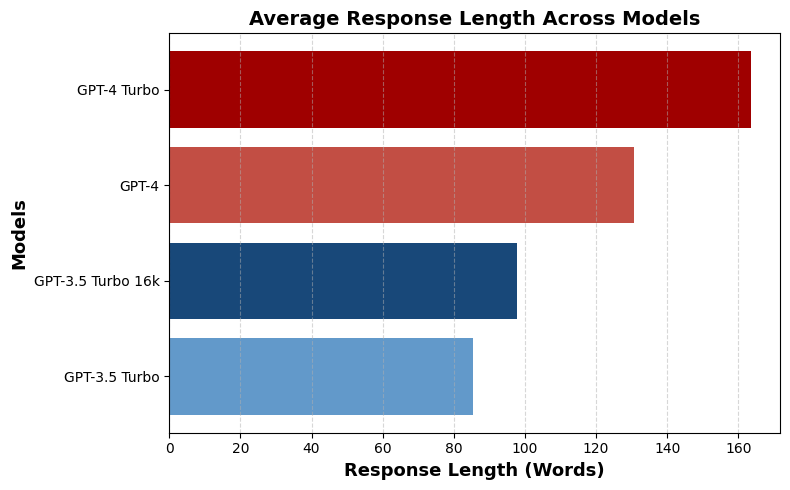

In [ ]:
import matplotlib.pyplot as plt

# Compute average response lengths per model
model_names = []
response_lengths = []

for model_name, results in evaluation_results.items():
    all_lengths = [len(r["response"].split()) for r in results]
    avg_length = sum(all_lengths) / len(all_lengths)

    model_names.append(model_name)
    response_lengths.append(avg_length)

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(model_names, response_lengths, color=['#6299CA', '#184879', '#C24E44', '#9F0000'])
plt.xlabel("Response Length (Words)", fontsize=13, fontweight='bold')
plt.ylabel("Models", fontsize=13, fontweight='bold')
plt.title("Average Response Length Across Models", fontsize= 14, fontweight='bold')
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("Average_Response_Length.png", dpi = 300)
plt.show()


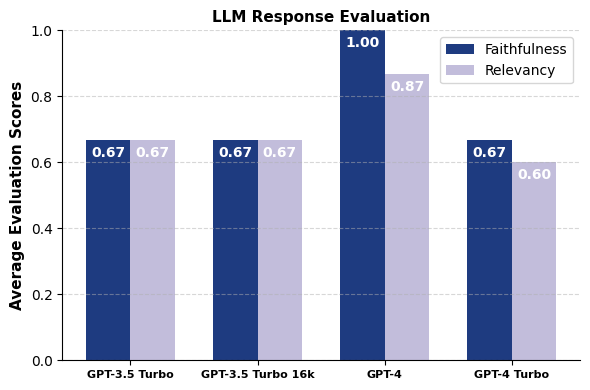

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["GPT-3.5 Turbo", "GPT-3.5 Turbo 16k", "GPT-4", "GPT-4 Turbo"]

faithfulness_scores = []
relevancy_scores = []

for model_name in llms.keys():
    model_data = evaluation_results[model_name]
    f_scores = [r["faithfulness_score"] for r in model_data]
    r_scores = [r["relevancy_score"] for r in model_data]

    faithfulness_scores.append(np.mean(f_scores))
    relevancy_scores.append(np.mean(r_scores))


# # Scores for each model (replace with actual values if needed)
# faithfulness_scores = [1.0, 1.0, 1.0, 1.0]  # Example values
# relevancy_scores = [1.0, 1.0, 1.0, 1.0]  # Example values

# Define x locations for each model
x = np.arange(len(models))

# Bar width
bar_width = 0.35

# Colors for Faithfulness & Relevancy
colors = ["#1e3B80", "#C2BDDB"]  # Dark blue & dark green

# Create figure
fig, ax = plt.subplots(figsize=(6, 4))

# Plot bars for Faithfulness and Relevancy
bars1 = ax.bar(x - bar_width/2, faithfulness_scores, bar_width, label="Faithfulness", color=colors[0])
bars2 = ax.bar(x + bar_width/2, relevancy_scores, bar_width, label="Relevancy", color=colors[1])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height - 0.05, f"{height:.2f}",
                ha='center', color='white', fontsize=10, fontweight='bold')

# Styling
ax.set_ylim(0, 1)  # Score range is 0-1
ax.set_ylabel("Average Evaluation Scores", fontsize=11, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=8, fontweight="bold")
ax.set_title("LLM Response Evaluation", fontsize=11, fontweight='bold')

# Remove top & right spines for clean look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Light gridlines
ax.grid(axis="y", linestyle="--", alpha=0.5)

# Add legend
ax.legend(fontsize=10, loc="upper right")
plt.tight_layout()
plt.savefig("Evaluation_metrics", dpi = 300)
plt.show()
